<a href="https://colab.research.google.com/github/bilalboukerma/Transfer-Learning-Techniques-In-Images-Medical/blob/main/basic_image_manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import cv2

This image is:  <class 'numpy.ndarray'> with dimensions: (28, 28)


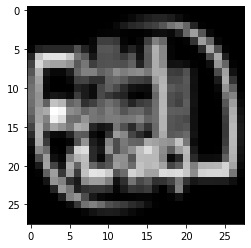

In [ ]:
#import all required lib 
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np 
from skimage.io import imread 
from skimage.transform import resize 
# Load a color image in grayscale 
image = imread('l.png')
image = resize(image,(28,28),mode='reflect') 
print('This image is: ',type(image), 'with dimensions:', image.shape) 
plt.imshow(image,cmap='gray') 

In [ ]:
image.shape

(28, 28)

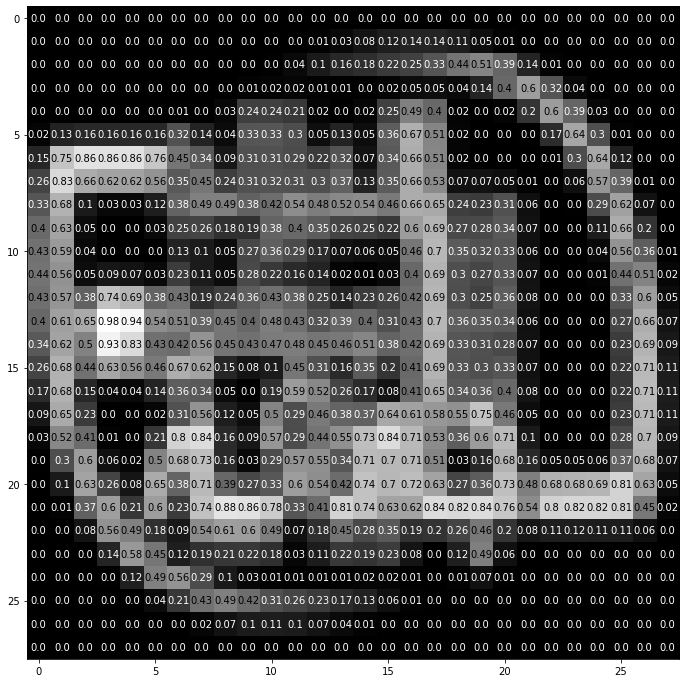

In [ ]:
def visualize_input (img, ax) : 
  ax.imshow(img, cmap='gray')
  width, height = img.shape
  thresh = img.max()/2.5
  for x in range (width) :
      for y in range (height) :
         ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                     horizontalalignment='center', 
                     verticalalignment='center',
                     color='white' if img[x][y]<thresh else 'black') 
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
visualize_input(np.array(image), ax)

In [ ]:
left = 1
right = 2
upper = 25
lower = 0
crop_horizontal = image[upper:lower ,left:right,:] 
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(crop_horizontal, cv2.COLOR_BGR2RGB))
plt.show()

padding

In [ ]:
import tensorflow as tf


# We define a convenience function to calculate the convolutional layer. This
# function initializes the convolutional layer weights and performs
# corresponding dimensionality elevations and reductions on the input and
# output
def comp_conv2d(conv2d, X):
    # Here (1, 1) indicates that the batch size and the number of channels
    # are both 1
    X = tf.reshape(X, (1, ) + X.shape + (1, ))
    Y = conv2d(X)
    # Exclude the first two dimensions that do not interest us: examples and
    # channels
    return tf.reshape(Y, Y.shape[1:3])
# Note that here 1 row or column is padded on either side, so a total of 2
# rows or columns are added
conv2d = tf.keras.layers.Conv2D(1, kernel_size=3, padding='same')
X = tf.random.uniform(shape=(8, 8))
comp_conv2d(conv2d, X).shape